In [2]:
# Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el archivo CSV
df_original = pd.read_csv('list_attr_celeba.csv')

In [4]:
# Visualizar las primeras filas del DataFrame
print(df_original.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

## Razones para eliminar las siguientes 10 columnas del dataset

- **Attractive (Atractivo(a)):** Se eliminó porque la atracción física es subjetiva y puede variar según la percepción individual, lo que podría no ser relevante para identificar a personas desaparecidas.
- **Blurry (Borroso(a)):** Eliminado porque indica la calidad de la imagen y no características físicas de la persona. En un contexto de identificación facial, es más importante centrarse en rasgos físicos claros y distintivos.
- **Heavy_Makeup (Maquillaje pesado):** Eliminado porque el maquillaje pesado puede ser temporal y no proporcionar información útil para la identificación a largo plazo de una persona. Además, el maquillaje puede ser fácilmente cambiado o retirado.
- **Mouth_Slightly_Open (Boca ligeramente abierta):** Eliminado porque la apertura ligeramente de la boca es una característica dinámica que puede no ser útil para la identificación facial. Además, muchas imágenes de personas pueden tener la boca ligeramente abierta debido a la expresión facial natural.
- **Smiling (Sonriendo):** Eliminado porque la sonrisa es una expresión facial dinámica y puede no ser útil para la identificación facial. Además, las personas pueden tener diferentes expresiones faciales en diferentes momentos y situaciones.
- **Wearing_Earrings (Usando aretes):** Eliminado porque el uso de aretes es una característica de vestimenta que puede variar fácilmente y no proporcionar información útil para la identificación a largo plazo de una persona.
- **Wearing_Hat (Usando sombrero):** Eliminado porque el uso de sombrero puede ser temporal y no proporcionar información útil para la identificación a largo plazo de una persona.
- **Wearing_Lipstick (Usando lápiz labial):** Eliminado porque el uso de lápiz labial también puede ser temporal y no necesariamente una característica distintiva de una persona para propósitos de identificación.
- **Wearing_Necklace (Usando collar):** Eliminado porque el uso de collar es una característica que puede cambiar fácilmente y no proporcionar información útil para la identificación a largo plazo.
- **Wearing_Necktie (Usando corbata):** Eliminado porque el uso de corbata es una característica de vestimenta que puede variar dependiendo del contexto y no es necesariamente útil para la identificación facial.

In [9]:
# Lista de columnas a eliminar
columnas_eliminar = ['Attractive', 'Blurry', 'Heavy_Makeup', 'Mouth_Slightly_Open', 
                     'Smiling', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 
                     'Wearing_Necklace', 'Wearing_Necktie']

In [10]:
# Eliminar las columnas
df_nuevo = df_original.drop(columns=columnas_eliminar)

In [11]:
# Guardar el nuevo dataset en un nuevo archivo CSV
df_nuevo.to_csv('list_attr_celeba_limpio.csv', index=False)

In [12]:
# Cargar el archivo CSV actualizado
df = pd.read_csv('list_attr_celeba_limpio.csv')

In [13]:
# Calcular el porcentaje de presencia de cada característica
presence_percentages = df.drop(columns=['image_id']).apply(lambda x: (x == 1).mean() * 100)

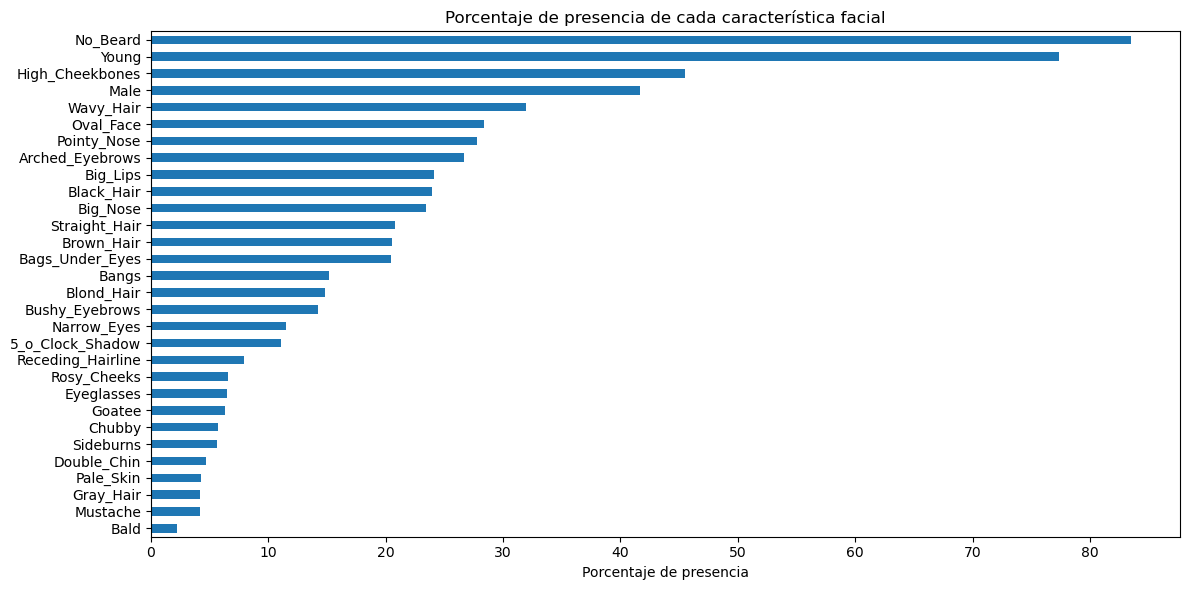

In [14]:
# Visualizar el porcentaje de presencia de cada característica
plt.figure(figsize=(12, 6))
presence_percentages.sort_values().plot(kind='barh')
plt.xlabel('Porcentaje de presencia')
plt.title('Porcentaje de presencia de cada característica facial')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

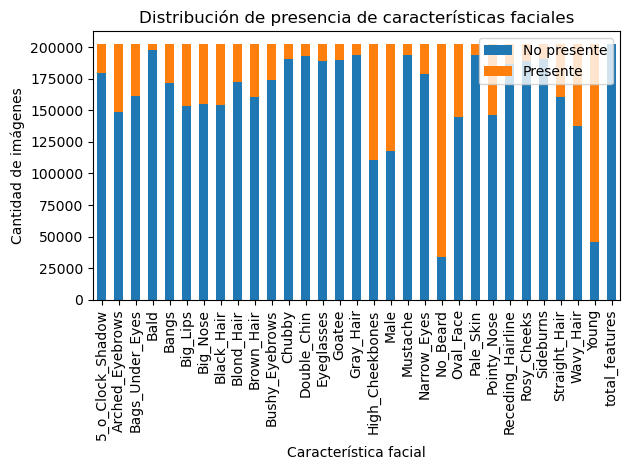

In [19]:
# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
presence_counts = df.drop(columns=['image_id']).apply(lambda x: (x == 1).value_counts())
presence_counts.T.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.xlabel('Característica facial')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de presencia de características faciales')
plt.legend(['No presente', 'Presente'], loc='upper right')
plt.tight_layout()
plt.show()

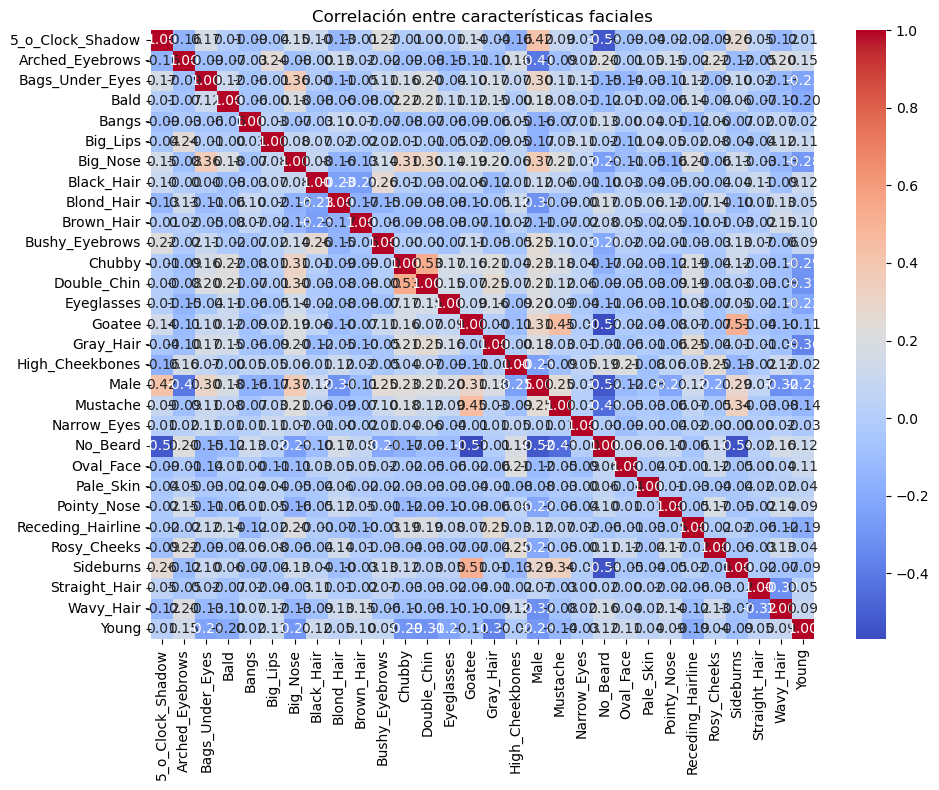

In [16]:
# Análisis de patrones
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['image_id']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre características faciales')
plt.tight_layout()
plt.show()

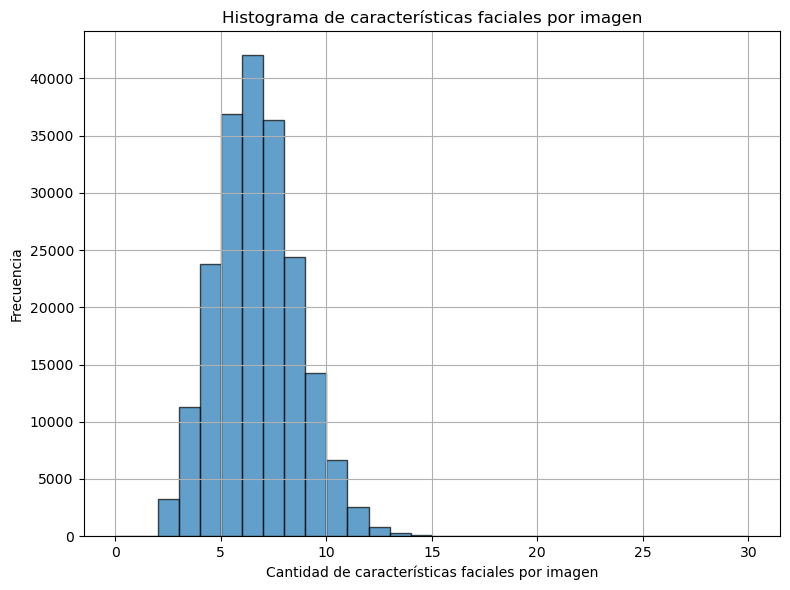

In [18]:
# Histograma de características por imagen
df['total_features'] = df.drop(columns=['image_id']).apply(lambda x: (x == 1).sum(), axis=1)
plt.figure(figsize=(8, 6))
plt.hist(df['total_features'], bins=range(0, 31), edgecolor='black', alpha=0.7)
plt.xlabel('Cantidad de características faciales por imagen')
plt.ylabel('Frecuencia')
plt.title('Histograma de características faciales por imagen')
plt.grid(True)
plt.tight_layout()
plt.show()